In [1]:
# import necessary libs
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# this is basically your labels which you need to encode it inside alr
data = pd.read_csv('ppp_transformed_updated.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961892 entries, 0 to 961891
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   LoanNumber                                  961892 non-null  int64  
 1   DateApproved                                961892 non-null  object 
 2   SBAOfficeCode                               961892 non-null  int64  
 3   ProcessingMethod                            961892 non-null  object 
 4   BorrowerName                                961892 non-null  object 
 5   BorrowerCity                                961892 non-null  object 
 6   BorrowerState                               961892 non-null  object 
 7   BorrowerZip                                 961892 non-null  object 
 8   LoanStatus                                  961892 non-null  object 
 9   Term                                        961892 non-null  int64  
 

In [3]:
columns_to_drop = ['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'BorrowerName', 
                   'BorrowerCity', 'BorrowerZip', 'LoanStatus', 'Veteran','FranchiseName', 
                   'ServicingLenderName', 'ServicingLenderZip', 'RuralUrbanIndicator',
                   'HubzoneIndicator', 'LMIIndicator', 'ProjectCity', 'NAICSCode', 
                   'Race', 'Ethnicity', 'Gender', 'REFINANCE_EIDL_PROCEED_pct', 
                   'isDiffBorrowerAndProjectCity', 'Industry', 'Subsector', 
                   'ProcessingMethod_encoded', 'LoanStatus_encoded', 
                   'RuralUrbanIndicator_encoded', 'HubzoneIndicator_encoded', 
                   'LMIIndicator_encoded', 'BusinessAgeDescription_encoded', 'Race_encoded', 
                   'Ethnicity_encoded', 'BusinessType_encoded', 'Gender_encoded', 'Veteran_encoded', 
                   'Industry_encoded', 'Term_standardised', 'JobsReported_standardised', 
                   'PROCEED_Diff_standardised', 'UTILITIES_PROCEED_pct_standardised', 
                   'PAYROLL_PROCEED_pct_standardised', 'MORTGAGE_INTEREST_PROCEED_pct_standardised', 
                   'RENT_PROCEED_pct_standardised', 'REFINANCE_EIDL_PROCEED_pct_standardised', 
                   'HEALTH_CARE_PROCEED_pct_standardised', 'DEBT_INTEREST_PROCEED_pct_standardised', 
                   'InitialApprovalAmount_scaled_standardised', 'CurrentApprovalAmount_scaled_standardised', 
                   'TOTAL_PROCEED_scaled_standardised', 'PROCEED_Per_Job_scaled_standardised',]

# Drop the specified columns
data.drop(columns=columns_to_drop, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961892 entries, 0 to 961891
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ProcessingMethod               961892 non-null  object 
 1   BorrowerState                  961892 non-null  object 
 2   Term                           961892 non-null  int64  
 3   InitialApprovalAmount          961892 non-null  float64
 4   CurrentApprovalAmount          961892 non-null  float64
 5   BusinessAgeDescription         961892 non-null  object 
 6   JobsReported                   961892 non-null  int64  
 7   BusinessType                   961892 non-null  object 
 8   TOTAL_PROCEED                  961892 non-null  float64
 9   PROCEED_Diff                   961892 non-null  float64
 10  UTILITIES_PROCEED_pct          961892 non-null  float64
 11  PAYROLL_PROCEED_pct            961892 non-null  float64
 12  MORTGAGE_INTEREST_PROCEED_pct 

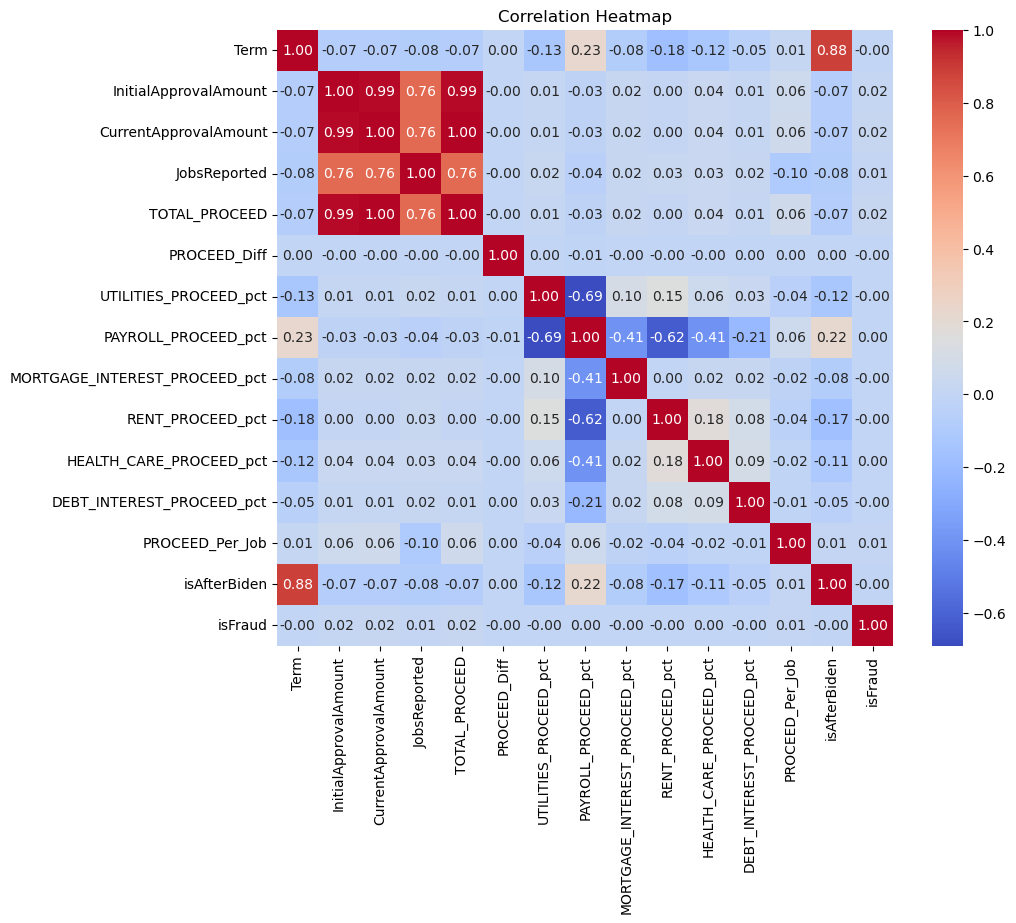

In [4]:
# Calculate the correlation matrix
corr = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [5]:
data["BusinessAgeDescription"].value_counts()

BusinessAgeDescription
Existing or more than 2 years old         857377
New Business or 2 years or less            53286
Unanswered                                 50520
Change of Ownership                          422
Startup, Loan Funds will Open Business       287
Name: count, dtype: int64

In [6]:
data = data[data['BusinessAgeDescription'] != 'Unanswered']

In [7]:
data["BusinessAgeDescription"].value_counts()

BusinessAgeDescription
Existing or more than 2 years old         857377
New Business or 2 years or less            53286
Change of Ownership                          422
Startup, Loan Funds will Open Business       287
Name: count, dtype: int64

In [8]:
data["BusinessType"].value_counts()

BusinessType
Corporation                            395398
Limited  Liability Company(LLC)        246300
Subchapter S Corporation               163257
Non-Profit Organization                 51290
Partnership                             16947
Limited Liability Partnership           12169
Sole Proprietorship                     11629
Professional Association                 6107
Cooperative                              2310
501(c)3 – Non Profit                     1737
Non-Profit Childcare Center               853
501(c)6 – Non Profit Membership           764
Unknown                                   632
Employee Stock Ownership Plan(ESOP)       607
Self-Employed Individuals                 448
Trust                                     372
Housing Co-op                             152
Joint Venture                             123
Independent Contractors                   100
Single Member LLC                          76
Tribal Concerns                            60
Tenant in Common     

In [9]:
data = data[data["BusinessType"] != 'Unknown']

In [10]:
data["BusinessType"].value_counts()

BusinessType
Corporation                            395398
Limited  Liability Company(LLC)        246300
Subchapter S Corporation               163257
Non-Profit Organization                 51290
Partnership                             16947
Limited Liability Partnership           12169
Sole Proprietorship                     11629
Professional Association                 6107
Cooperative                              2310
501(c)3 – Non Profit                     1737
Non-Profit Childcare Center               853
501(c)6 – Non Profit Membership           764
Employee Stock Ownership Plan(ESOP)       607
Self-Employed Individuals                 448
Trust                                     372
Housing Co-op                             152
Joint Venture                             123
Independent Contractors                   100
Single Member LLC                          76
Tribal Concerns                            60
Tenant in Common                           25
501(c) – Non Profit e

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910740 entries, 0 to 961891
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ProcessingMethod               910740 non-null  object 
 1   BorrowerState                  910740 non-null  object 
 2   Term                           910740 non-null  int64  
 3   InitialApprovalAmount          910740 non-null  float64
 4   CurrentApprovalAmount          910740 non-null  float64
 5   BusinessAgeDescription         910740 non-null  object 
 6   JobsReported                   910740 non-null  int64  
 7   BusinessType                   910740 non-null  object 
 8   TOTAL_PROCEED                  910740 non-null  float64
 9   PROCEED_Diff                   910740 non-null  float64
 10  UTILITIES_PROCEED_pct          910740 non-null  float64
 11  PAYROLL_PROCEED_pct            910740 non-null  float64
 12  MORTGAGE_INTEREST_PROCEED_pct  9107

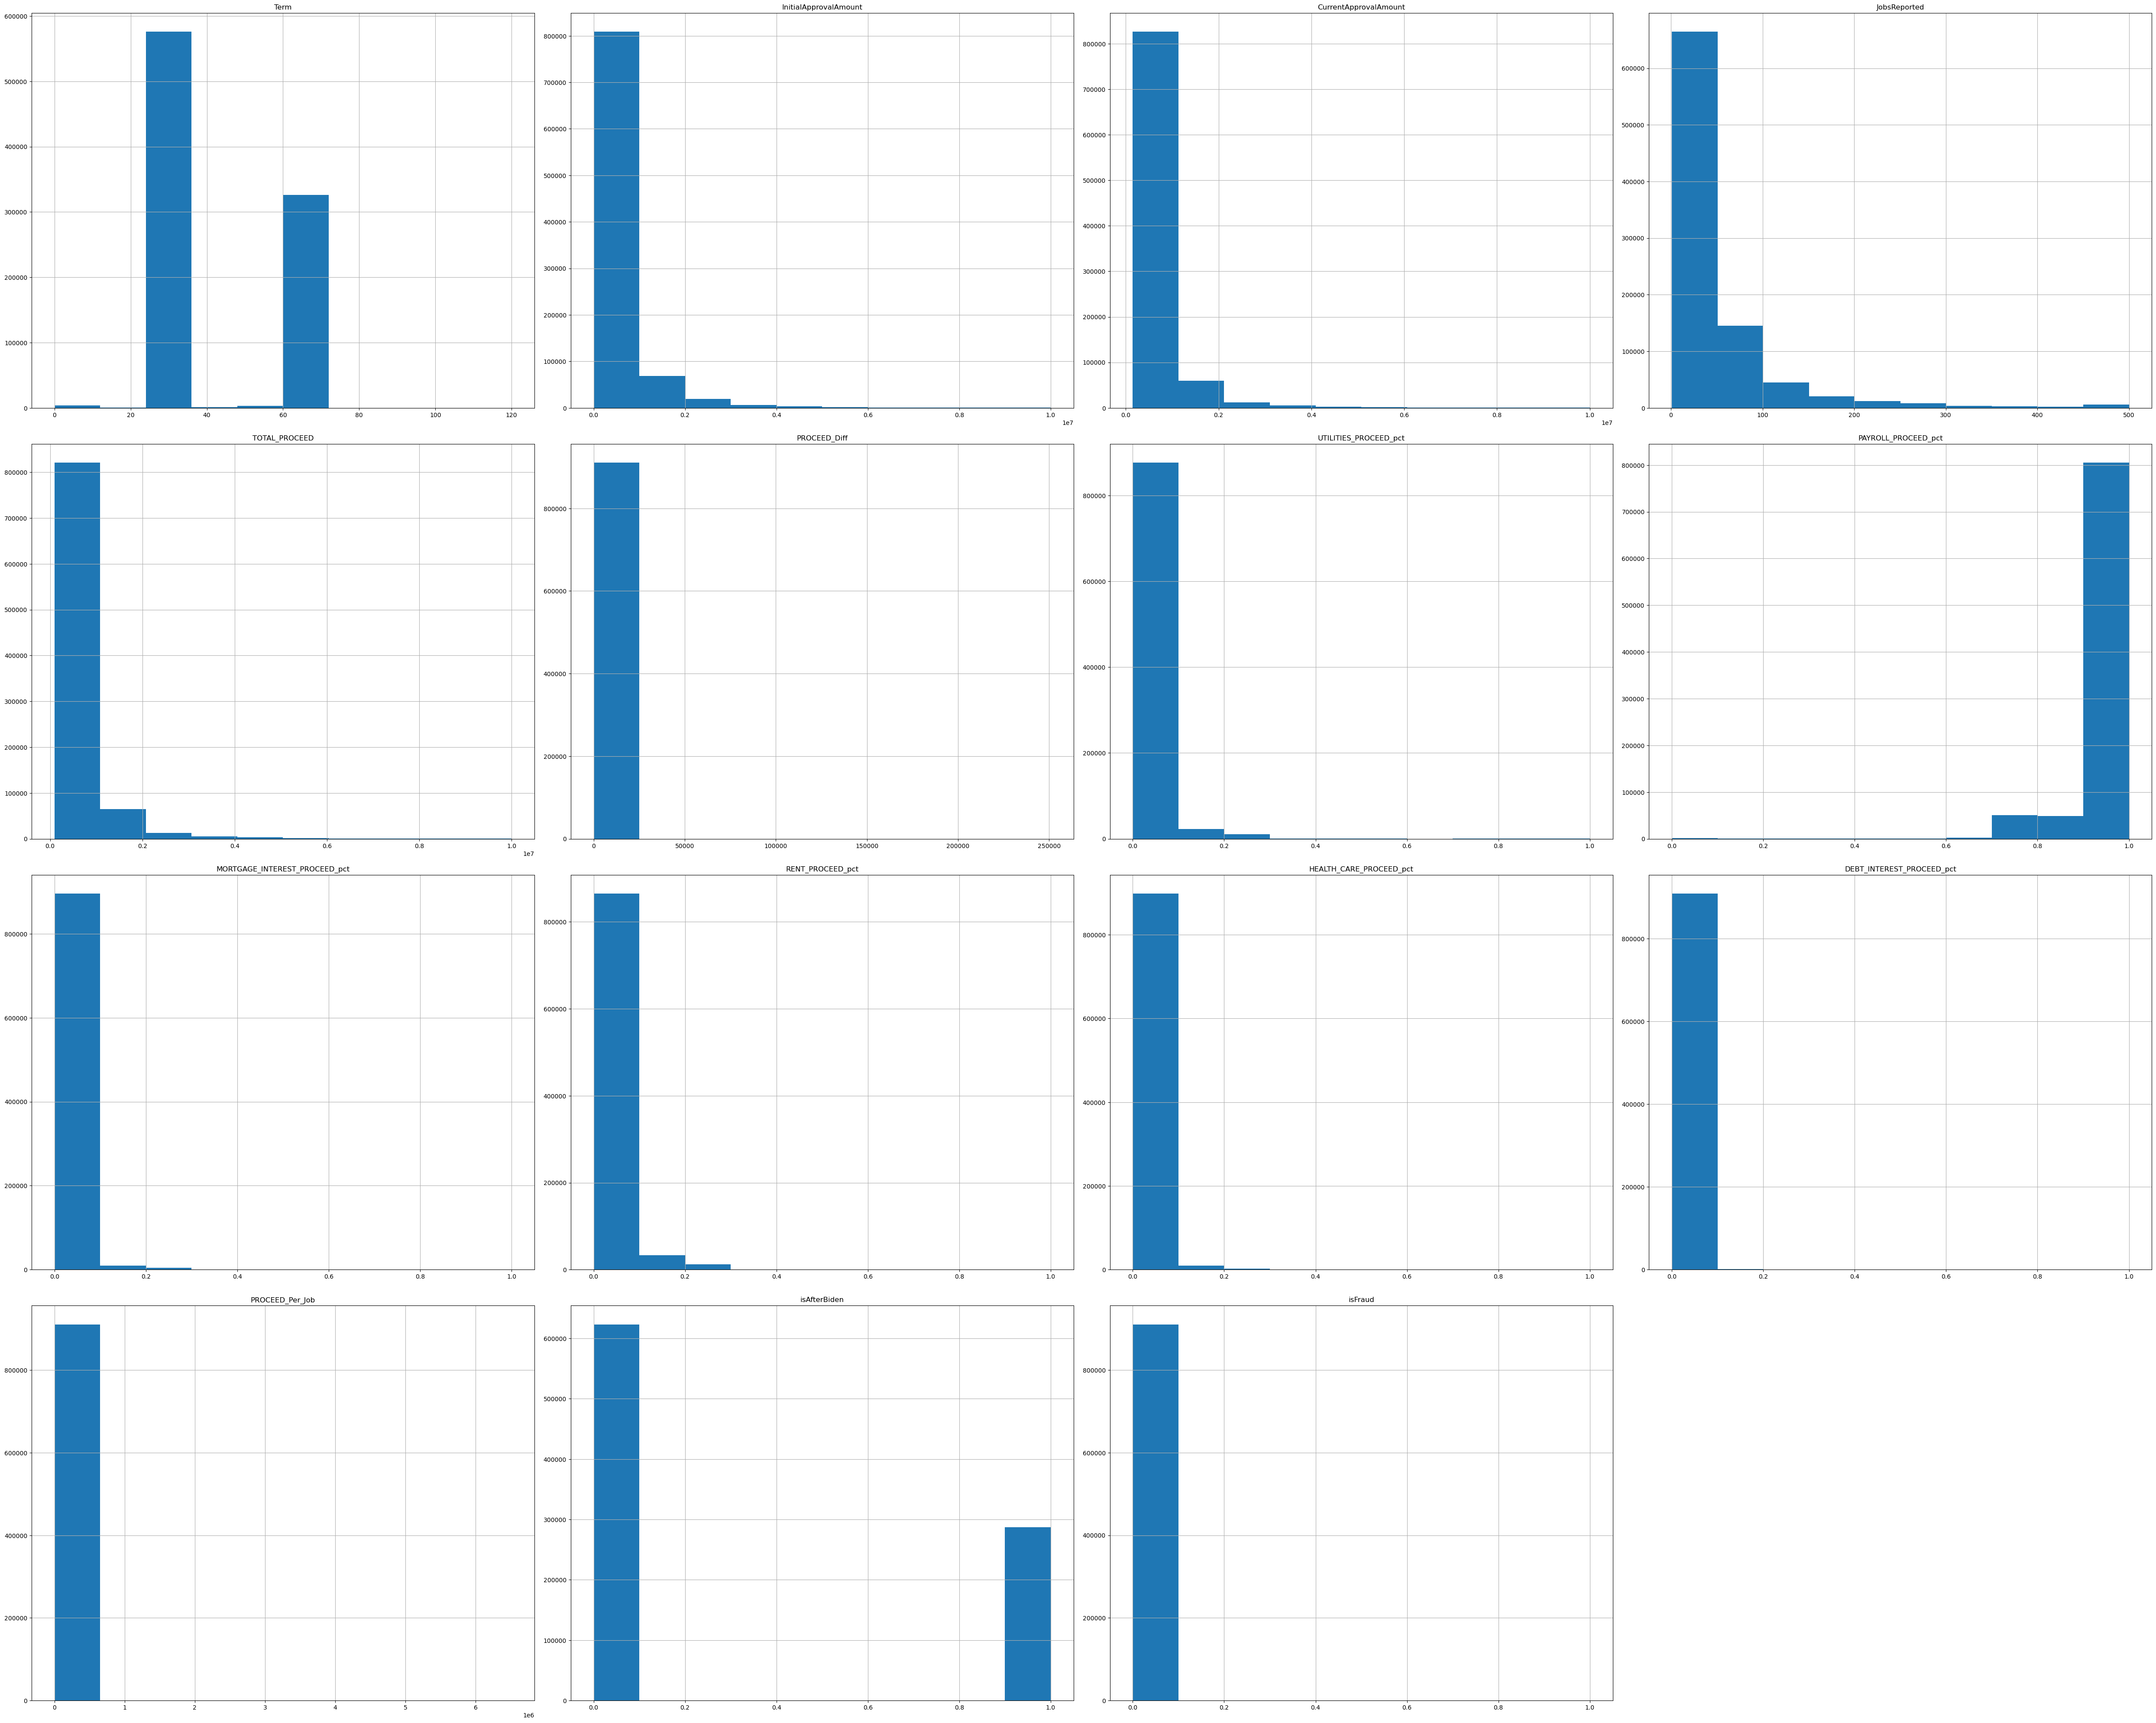

In [12]:
data.hist(figsize = (50,40))
plt.tight_layout(pad = 1.5)
plt.show()

In [14]:
dummy_columns = ["BorrowerState", "BusinessAgeDescription", "BusinessType"]

for column in dummy_columns:
    dummies = pd.get_dummies(data[column], prefix=column, dtype=int)
    data = pd.concat([data, dummies], axis=1)
    
data.drop(dummy_columns, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910740 entries, 0 to 961891
Columns: 102 entries, ProcessingMethod to BusinessType_Trust
dtypes: float64(11), int32(86), int64(4), object(1)
memory usage: 416.9+ MB


In [14]:
from sklearn.preprocessing import LabelEncoder

object_columns = ["ProcessingMethod"]

# Apply label encoding to object columns
label_encoder = LabelEncoder()
for col in object_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [15]:
data.head()

,ProcessingMethod,Term,InitialApprovalAmount,CurrentApprovalAmount,JobsReported,TOTAL_PROCEED,PROCEED_Diff,UTILITIES_PROCEED_pct,PAYROLL_PROCEED_pct,MORTGAGE_INTEREST_PROCEED_pct,...,BusinessType_Professional Association,BusinessType_Qualified Joint-Venture (spouses),BusinessType_Rollover as Business Start-Ups (ROB,BusinessType_Self-Employed Individuals,BusinessType_Single Member LLC,BusinessType_Sole Proprietorship,BusinessType_Subchapter S Corporation,BusinessType_Tenant in Common,BusinessType_Tribal Concerns,BusinessType_Trust
0,0,24,769358.78,769358.78,62,769358.78,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,24,736927.79,736927.79,73,736927.79,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0,24,499871.00,499871.00,21,499871.00,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0,24,289765.00,289765.00,89,289765.00,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12,0,60,9571397.00,9538531.00,385,9538531.00,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# To use MinMax Scalar to transform data

In [16]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

columns_to_scale = ["Term", "InitialApprovalAmount", "CurrentApprovalAmount", "JobsReported",
                   "TOTAL_PROCEED", "PROCEED_Diff", "UTILITIES_PROCEED_pct", "PAYROLL_PROCEED_pct",
                   "MORTGAGE_INTEREST_PROCEED_pct", "RENT_PROCEED_pct", "HEALTH_CARE_PROCEED_pct",
                   "DEBT_INTEREST_PROCEED_pct", "PROCEED_Per_Job"]

scaler = MinMaxScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [17]:
data.head()

,ProcessingMethod,Term,InitialApprovalAmount,CurrentApprovalAmount,JobsReported,TOTAL_PROCEED,PROCEED_Diff,UTILITIES_PROCEED_pct,PAYROLL_PROCEED_pct,MORTGAGE_INTEREST_PROCEED_pct,...,BusinessType_Professional Association,BusinessType_Qualified Joint-Venture (spouses),BusinessType_Rollover as Business Start-Ups (ROB,BusinessType_Self-Employed Individuals,BusinessType_Single Member LLC,BusinessType_Sole Proprietorship,BusinessType_Subchapter S Corporation,BusinessType_Tenant in Common,BusinessType_Tribal Concerns,BusinessType_Trust
0,0,0.2,0.076936,0.062879,0.122244,0.068101,0.000398,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.2,0.073693,0.059587,0.144289,0.064827,0.000398,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0,0.2,0.049987,0.035520,0.040080,0.040895,0.000398,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0,0.2,0.028976,0.014189,0.176353,0.019683,0.000398,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12,0,0.5,0.957140,0.953150,0.769539,0.953411,0.000398,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.decomposition import PCA

# Extract all numerical variables for PCA
num_var = data[columns_to_scale]
num_var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910740 entries, 0 to 961891
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Term                           910740 non-null  float64
 1   InitialApprovalAmount          910740 non-null  float64
 2   CurrentApprovalAmount          910740 non-null  float64
 3   JobsReported                   910740 non-null  float64
 4   TOTAL_PROCEED                  910740 non-null  float64
 5   PROCEED_Diff                   910740 non-null  float64
 6   UTILITIES_PROCEED_pct          910740 non-null  float64
 7   PAYROLL_PROCEED_pct            910740 non-null  float64
 8   MORTGAGE_INTEREST_PROCEED_pct  910740 non-null  float64
 9   RENT_PROCEED_pct               910740 non-null  float64
 10  HEALTH_CARE_PROCEED_pct        910740 non-null  float64
 11  DEBT_INTEREST_PROCEED_pct      910740 non-null  float64
 12  PROCEED_Per_Job                9107

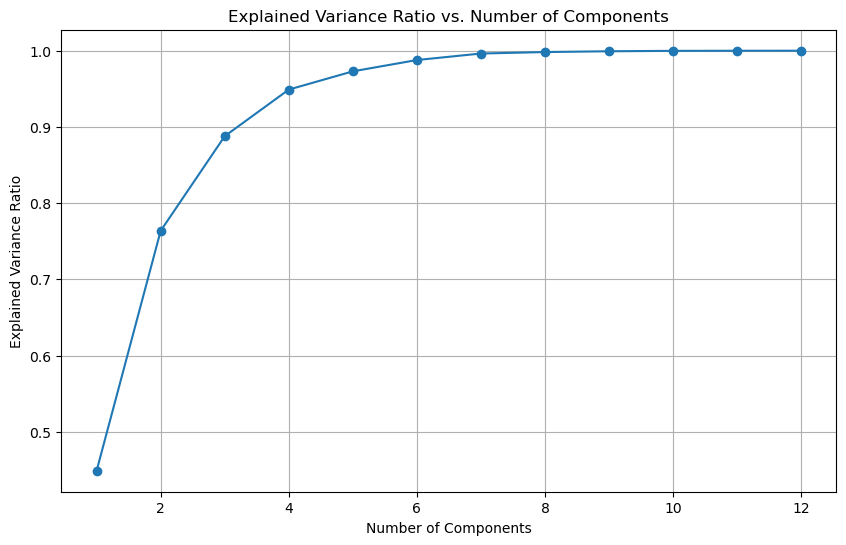

In [36]:
# Initialize a list to store explained variance ratios
explained_variance_ratios = []

# Maximum number of components to consider
max_components = min(len(num_var.columns), 12)  # Adjust as needed

# Calculate explained variance ratio for each component count
for i in range(1, max_components + 1):
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(num_var)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), explained_variance_ratios, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [21]:
# Make a copy of the original cleaned data
data_copy = data.copy()

# Number of components
num_components = 4

# Create a PCA object
pca_1 = PCA(n_components=num_components)

# Fit and transform the standardized data
pca_result_1 = pca_1.fit_transform(num_var)

In [23]:
pca_result_1.shape

(910740, 4)

In [45]:
# Access the loadings (coefficients) of each feature for the first 3 components
loadings = pca_1.components_[:4, :]

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=num_var.columns)

# Display the loadings
print(loadings_df)

Loadings for the first 4 components:
       Term  InitialApprovalAmount  CurrentApprovalAmount  JobsReported  \
0 -0.239737               0.379890               0.383477      0.707813   
1  0.936515               0.100695               0.102275      0.176858   
2  0.255033              -0.016150              -0.015531      0.018395   
3  0.000675               0.418645               0.423028     -0.683505   

   TOTAL_PROCEED  PROCEED_Diff  UTILITIES_PROCEED_pct  PAYROLL_PROCEED_pct  \
0       0.381340     -0.000009               0.020257            -0.061359   
1       0.101705      0.000020              -0.077912             0.217568   
2      -0.015450      0.000205               0.362972            -0.848699   
3       0.420671      0.000003               0.016240            -0.031039   

   MORTGAGE_INTEREST_PROCEED_pct  RENT_PROCEED_pct  HEALTH_CARE_PROCEED_pct  \
0                       0.009114          0.018977                 0.010642   
1                      -0.026661      

PC1: 
- Jobs Reported, CurrentApprovalAmount, TOTAL_PROCEED, InitialApprovalAmount

PC2:
- Term

In [18]:
cleaned_data = data.copy()

In [20]:
# Specify the file path where you want to save the cleaned data
file_path = "C:/Zhan Hui/2023 Sem 1/DM&BA/Project/cleaned_data.csv"

# Save the cleaned data to a CSV file
cleaned_data.to_csv(file_path, index=False)  # Set index=False to avoid saving row indices
print("Cleaned data saved to", file_path)

Cleaned data saved to C:/Zhan Hui/2023 Sem 1/DM&BA/Project/cleaned_data.csv
